In [48]:
from vhepmc_evt_parser import data_set
import numpy as np
import physics as phys
import vmath as vm 
import CMS_analysis as ana
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy
import cms_plotter as cms_plt
import basic_plotter as bp
import pandas as pd
import seaborn as sns

In [49]:
#Load a data set - lifetime generations are included below
my_set = data_set()
my_set.set_parent(parent_pid = 999999)
my_set.set_decay_options(np.array([11,13,211]))
#my_set.fill_custom("events_CMS_card-cms-m:2-ct:100_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m:2-ct:100_mm05_set.npy")

Fill saved: --- 0.0031213760375976562 seconds ---


In [50]:
dpA, muA, amuA, tracksA, jetsA= ana.prep_dataset(my_set)

In [51]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:8-ct:10_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m:8-ct:10_mm05_set.npy")
dpB, muB, amuB, tracksB, jetsB = ana.prep_dataset(my_set)

Fill saved: --- 0.0034554004669189453 seconds ---


In [52]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_CMS_card-cms-m:15-ct:1_mm05_set.npy")
dpC, muC, amuC, tracksC, jetsC = ana.prep_dataset(my_set)

Fill saved: --- 0.002383708953857422 seconds ---


In [53]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-m:p5-ct:1_mm09_full_set.npy")
dpD, muD, amuD, tracksD, jetsD = ana.prep_dataset(my_set)

Fill saved: --- 0.013498067855834961 seconds ---


In [54]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-m:2-ct:10_mm09_full_set.npy")
dpE, muE, amuE, tracksE, jetsE = ana.prep_dataset(my_set)

Fill saved: --- 0.021462440490722656 seconds ---


In [55]:
my_set.clear_data()
#my_set.fill_custom("events_CMS_card-cms-m:15-ct:1_mm05.dat")
my_set.fill_saved("../data_arrays/events_B_to_LLP-m:4-ct:100_mm09_full_set.npy")
dpF, muF, amuF, tracksF, jetsF = ana.prep_dataset(my_set)

Fill saved: --- 0.01378321647644043 seconds ---


## List choices for cuts - right now the event cut (combined L1T and HLT_lxy) is automatic

In [56]:
ana.list_choices()

Set filter by inputting an array of choices
Event:0:L1T_cut
Event:1:HLT_lxy_cut
Pair:2:HLT_iso_cut
Pair:3:HLT_dphi_muonsDV_cut
Pair:4:HLT_dphi_muons_cut
Pair:5:HLT_pileup_cut
Pair:6:HLT_dxy_cut


## Figure 1
Distribution of $p_T^{\mu\mu}$ for data events and illustrative benchmark signal models, after applying the full event selection.

In [57]:
cuts = np.array([True, True, False, True, True, True, True]) #Don't include any additional HLT cuts
#cuts = np.array([False, False, False, False, False, False, False]) #Apply no cuts - see full distributions

In [58]:
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(dpA, muA, amuA, tracksA, jetsA, cuts)

Final: 1057 muon pairs
Ratio: 0.05285
Analyze time: --- 0.04169440269470215 seconds ---


In [59]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(dpB, muB, amuB, tracksB, jetsB, cuts)

Final: 13441 muon pairs
Ratio: 0.67205
Analyze time: --- 0.04334878921508789 seconds ---


In [60]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(dpC, muC, amuC, tracksC, jetsC, cuts)

Final: 14636 muon pairs
Ratio: 0.7318
Analyze time: --- 0.04300069808959961 seconds ---


In [61]:
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(dpD, muD, amuD, tracksD, jetsD, cuts)

Final: 1428 muon pairs
Ratio: 0.6839080459770115
Analyze time: --- 0.005795478820800781 seconds ---


In [62]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(dpE, muE, amuE, tracksE, jetsE, cuts)

Final: 2192 muon pairs
Ratio: 0.6790582403965304
Analyze time: --- 0.007556438446044922 seconds ---


Note: Figures 2, 3, 4 contain condition lxy > 1cm & lxy < 11cm

In [63]:
labelA = 'H->ZdZd_m:2-ct:100'
labelB = 'H->ZdZd_m:8-ct:10'
labelC = 'H->ZdZd_m:15-ct:1'
labelD = 'B->phi_m:0.5-ct:1'
labelE = 'B->phi_m:2-ct:10'

In [64]:
dimuon_pTA = phys.comb_pT(final_muA.get(final_cutA), final_amuA.get(final_cutA))
dimuon_pTB = phys.comb_pT(final_muB.get(final_cutB), final_amuB.get(final_cutB))
dimuon_pTC = phys.comb_pT(final_muC.get(final_cutC), final_amuC.get(final_cutC))
dimuon_pTD = phys.comb_pT(final_muD.get(final_cutD), final_amuD.get(final_cutD))
dimuon_pTE = phys.comb_pT(final_muE.get(final_cutE), final_amuE.get(final_cutE))

In [65]:
hs = 'step'
lw = 1.5
nbins = 50
rng = (0, 100.)
dns = True

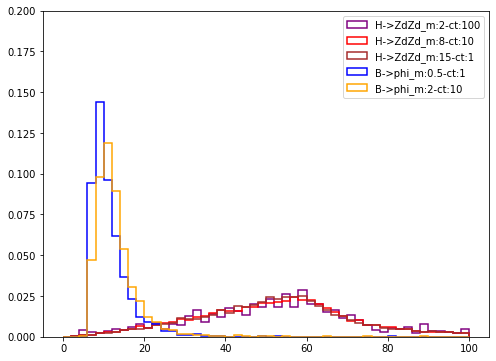

In [67]:
fig = plt.figure(figsize=(8,6))
plt.ylim((0,0.2))
plt.hist(dimuon_pTA, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='purple', label=labelA)
plt.hist(dimuon_pTB, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='red', label=labelB)
plt.hist(dimuon_pTC, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='brown', label=labelC)
plt.hist(dimuon_pTD, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='blue', label=labelD)
plt.hist(dimuon_pTE, histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color='orange', label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_1.png")

In [21]:
ana.print_cut_selection(cuts)

Cut choices
True:L1T_cut
True:HLT_lxy_cut
False:HLT_iso_cut
True:HLT_dphi_muonsDV_cut
True:HLT_dphi_muons_cut
True:HLT_pileup_cut
True:HLT_dxy_cut


## Figure 2 
Distribution of $\Delta(\mu\mu, \vec{DV})$ for data events and illustrative benchmark signal models, after applying the trigger selections and muon and DV quality criteria. 

In [68]:
cuts = np.array([True, False, False, False, False, False, False]) #Don't include any additional HLT cuts

In [69]:
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(dpA, muA, amuA, tracksA, jetsA, cuts)

Final: 17692 muon pairs
Ratio: 0.8846
Analyze time: --- 0.037600040435791016 seconds ---


In [70]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(dpB, muB, amuB, tracksB, jetsB, cuts)

Final: 17370 muon pairs
Ratio: 0.8685
Analyze time: --- 0.037225961685180664 seconds ---


In [71]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(dpC, muC, amuC, tracksC, jetsC, cuts)

Final: 16730 muon pairs
Ratio: 0.8365
Analyze time: --- 0.037352800369262695 seconds ---


In [72]:
#Note: Just the trigger selections remove the vast majority of the B model
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(dpD, muD, amuD, tracksD, jetsD, cuts)

Final: 2088 muon pairs
Ratio: 1.0
Analyze time: --- 0.0043792724609375 seconds ---


In [73]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(dpE, muE, amuE, tracksE, jetsE, cuts)

Final: 3228 muon pairs
Ratio: 1.0
Analyze time: --- 0.005884885787963867 seconds ---


In [74]:
final_cutA = final_cutA & (phys.lxy(final_muA) > 10.) & (phys.lxy(final_muA) < 110.)
final_cutB = final_cutB & (phys.lxy(final_muB) > 10.) & (phys.lxy(final_muB) < 110.)
final_cutC = final_cutC & (phys.lxy(final_muC) > 10.) & (phys.lxy(final_muC) < 110.)
final_cutD = final_cutD & (phys.lxy(final_muD) > 10.) & (phys.lxy(final_muD) < 110.)
final_cutE = final_cutE & (phys.lxy(final_muE) > 10.) & (phys.lxy(final_muE) < 110.)

In [75]:
DV = deepcopy(final_muA.xi)
DV[:,3] = 0
pmm = (final_muA.p + final_amuA.p)
dphiA = vm.vec4_dphi(DV, pmm)

In [76]:
DV = deepcopy(final_muB.xi)
DV[:,3] = 0
pmm = (final_muB.p + final_amuB.p)
dphiB = vm.vec4_dphi(DV, pmm)

In [77]:
DV = deepcopy(final_muC.xi)
DV[:,3] = 0
pmm = (final_muC.p + final_amuC.p)
dphiC = vm.vec4_dphi(DV, pmm)

In [78]:
DV = deepcopy(final_muD.xi)
DV[:,3] = 0
pmm = (final_muD.p + final_amuD.p)
dphiD = vm.vec4_dphi(DV, pmm)

In [79]:
DV = deepcopy(final_muE.xi)
DV[:,3] = 0
pmm = (final_muE.p + final_amuE.p)
dphiE = vm.vec4_dphi(DV, pmm)

In [80]:
hs = 'step'
lw = 1.5
nbins = 20
rng = (0, 0.2)
dns = True

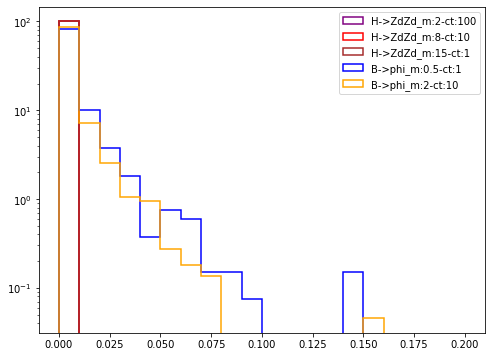

In [81]:
fig = plt.figure(figsize=(8,6))
plt.yscale('log')
plt.hist(dphiA[final_cutA], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="purple", label=labelA)
plt.hist(dphiB[final_cutB], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="red", label=labelB)
plt.hist(dphiC[final_cutC], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="brown", label=labelC)
plt.hist(dphiD[final_cutD], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="blue", label=labelD)
plt.hist(dphiE[final_cutE], histtype=hs, linewidth=lw, bins=nbins, range=rng, density=dns, color="orange", label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_2.png")

In [82]:
ana.print_cut_selection(cuts)

Cut choices
True:L1T_cut
False:HLT_lxy_cut
False:HLT_iso_cut
False:HLT_dphi_muonsDV_cut
False:HLT_dphi_muons_cut
False:HLT_pileup_cut
False:HLT_dxy_cut


## Figure 3
Distribution of $log_{10}(|\Delta\eta_{\mu\mu}|/\Delta\phi_{\mu\mu}|)$ in data events and illustrative benchmark signal models. The cut value is indicated by the red vertical dashed line. All selections except those involivng muon isolation, $d_{xy}$, and number of excess hits in the pixel tracker for each muon are applied. 

In [83]:
cuts = np.array([True, True, False, True, True, False, False])
final_dpA, final_muA, final_amuA, final_cutA, final_evt_cutA = ana.get_cms_eff(dpA, muA, amuA, jetsA, tracksA, cuts)

Final: 1198 muon pairs
Ratio: 0.0599
Analyze time: --- 0.03850078582763672 seconds ---


In [84]:
final_dpB, final_muB, final_amuB, final_cutB, final_evt_cutB = ana.get_cms_eff(dpB, muB, amuB, jetsB, tracksB, cuts)

Final: 15219 muon pairs
Ratio: 0.76095
Analyze time: --- 0.03996586799621582 seconds ---


In [85]:
final_dpC, final_muC, final_amuC, final_cutC, final_evt_cutC = ana.get_cms_eff(dpC, muC, amuC, tracksC, jetsC, cuts)

Final: 16557 muon pairs
Ratio: 0.82785
Analyze time: --- 0.04088735580444336 seconds ---


In [86]:
final_dpD, final_muD, final_amuD, final_cutD, final_evt_cutD = ana.get_cms_eff(dpD, muD, amuD, tracksD, jetsD, cuts)

Final: 1641 muon pairs
Ratio: 0.7859195402298851
Analyze time: --- 0.0056574344635009766 seconds ---


In [87]:
final_dpE, final_muE, final_amuE, final_cutE, final_evt_cutE = ana.get_cms_eff(dpE, muE, amuE, tracksD, jetsD, cuts)

Final: 2376 muon pairs
Ratio: 0.7360594795539034
Analyze time: --- 0.0067822933197021484 seconds ---


In [88]:
final_cutA = final_cutA & (phys.lxy(final_muA) > 10.) & (phys.lxy(final_muA) < 110.)
final_cutB = final_cutB & (phys.lxy(final_muB) > 10.) & (phys.lxy(final_muB) < 110.)
final_cutC = final_cutC & (phys.lxy(final_muC) > 10.) & (phys.lxy(final_muC) < 110.)
final_cutD = final_cutD & (phys.lxy(final_muD) > 10.) & (phys.lxy(final_muD) < 110.)
final_cutE = final_cutE & (phys.lxy(final_muE) > 10.) & (phys.lxy(final_muE) < 110.)

In [89]:
pileupA = phys.pileup(final_muA, final_amuA)
pileupB = phys.pileup(final_muB, final_amuB)
pileupC = phys.pileup(final_muC, final_amuC)
pileupD = phys.pileup(final_muD, final_amuD)
pileupE = phys.pileup(final_muE, final_amuE)

In [90]:
hs = 'step'
lw = 1.5
nbins = 20
rng = (0, 0.2)
dns = True

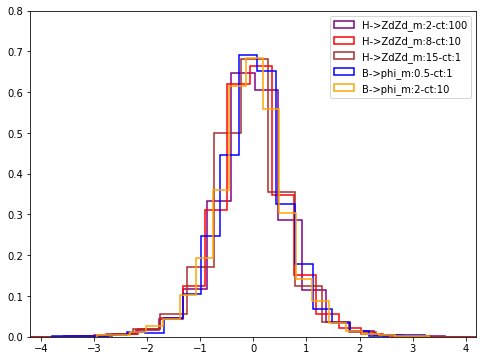

In [91]:
fig = plt.figure(figsize=(8,6))
plt.ylim((0,0.8))
plt.xlim((-4.2,4.2))
plt.hist(pileupA, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="purple", label=labelA)
plt.hist(pileupB, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="red", label=labelB)
plt.hist(pileupC, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="brown", label=labelC)
plt.hist(pileupD, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="blue", label=labelD)
plt.hist(pileupE, histtype=hs, linewidth=lw, bins=nbins, density=dns, color="orange", label=labelE)
plt.legend()
plt.show()
fig.savefig("../images/add_fig_3.png")

In [46]:
ana.print_cut_selection(cuts)

Cut choices
True:L1T_cut
True:HLT_lxy_cut
False:HLT_iso_cut
True:HLT_dphi_muonsDV_cut
True:HLT_dphi_muons_cut
False:HLT_pileup_cut
False:HLT_dxy_cut
